In [2]:
# Import needed functionalities
import math
import numpy as np
import pandas as pd
import scipy.spatial.distance as ssd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# from sklearn.cluster import KMeans
# from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing

In [3]:
# Import datasets
data3Dfull = pd.read_csv('data/data3.csv')
data6Dfull = pd.read_csv('data/data6.csv')

In [4]:
# method to sample a dataset (hardcoded seed for randomized selection, see alternatives in comment)
def get_sample_from_dataset(prop, dataset):
    # randomly define sample from dataset
    # good seeds to try: 13, 42, 1123, 5813, 213455
    np.random.seed(seed=42)
    # We are going to use bootstrapping
    sample_proportion =  prop
    dataset_size = len(dataset)
    sample_size = sample_proportion * dataset_size
    # perform scaling on the dataset
    dataset = preprocessing.scale(dataset)
    # Turn into a pandas array again
    d = {'V'+str(i+1) : dataset[:,i] for i in range(len(dataset[0]))}
    dataset = pd.DataFrame(d)
    
    print("The sample size we are going to use will be: "+ str(sample_size))
    # Run the sampling
    chosen_idx = np.random.choice(dataset_size, replace=False, size=int(sample_size))
    sampled_dataset =  dataset.iloc[chosen_idx]
    print("The new shape of the sampled dataset is: " + str(sampled_dataset.values.shape))
    return sampled_dataset

In [5]:
data3D = get_sample_from_dataset(0.05, data3Dfull)
data6D = get_sample_from_dataset(0.05, data6Dfull)

The sample size we are going to use will be: 15000.0
The new shape of the sampled dataset is: (15000, 3)
The sample size we are going to use will be: 15000.0
The new shape of the sampled dataset is: (15000, 6)


In [6]:
# Number of clusters
nClusters = 25

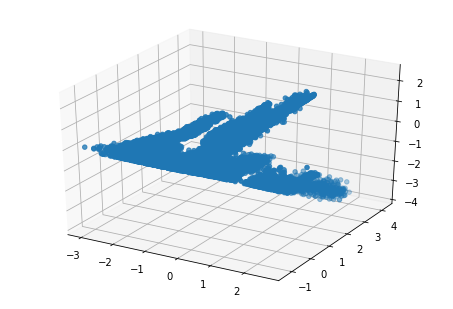

In [7]:
# Plot 3D figure
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data3D['V1'], data3D['V2'], data3D['V3'])

In [8]:
def run_gmm(nClusters, data, use_kmeans=True):
    method = 'kmeans' if use_kmeans else 'random'
    gmm = GaussianMixture(nClusters, init_params=method) #be default initialises using kmeans
    gmm = gmm.fit(data)
    labels = gmm.predict(data)
    means = gmm.means_
    return gmm, labels, means

In [11]:
# Experiment: likelihood evaluation
likelihood_experiment_enabled = False

n_samples = 10 #obtain likelihoods on this same sample
# see nClusters

likely = {'3d_kmeans' : 0, '6d_kmeans' : 0, '3d_random' : 0, '6d_random' : 0}
if likelihood_experiment_enabled:
    #gather sample likelihoods
    likely = {'3d_kmeans' : np.zeros((n_samples,)), '6d_kmeans' : np.zeros((n_samples,)), '3d_random' : np.zeros((n_samples,)), '6d_random' : np.zeros((n_samples,))}
    
    for exp_idx in range(n_samples):
        print("sample: " + str(exp_idx) + "\r")
        gmm_3d_kmeans, labels, C = run_gmm(25, data3D, True)
        gmm_6d_kmeans, labels, C = run_gmm(25, data6D, True)
        gmm_3d_random, labels, C = run_gmm(25, data3D, False)
        gmm_6d_random, labels, C = run_gmm(25, data6D, False)
        
        likely['3d_kmeans'][exp_idx] = math.exp(gmm_3d_kmeans.score(data3D))
        likely['6d_kmeans'][exp_idx] = math.exp(gmm_6d_kmeans.score(data6D))
        likely['3d_random'][exp_idx] = math.exp(gmm_3d_random.score(data3D))
        likely['6d_random'][exp_idx] = math.exp(gmm_6d_random.score(data6D))

# print e^log_likelihoods
print("gmm_3d_kmeans likelihood: ", str(np.mean(likely['3d_kmeans'])) + " std: " + str(np.std(likely['3d_kmeans'])))
print("gmm_6d_kmeans likelihood: ", str(np.mean(likely['6d_kmeans'])) + " std: " + str(np.std(likely['6d_kmeans'])))
print("gmm_3d_random likelihood: ", str(np.mean(likely['3d_random'])) + " std: " + str(np.std(likely['3d_random'])))
print("gmm_6d_random likelihood: ", str(np.mean(likely['6d_random'])) + " std: " + str(np.std(likely['6d_random'])))

gmm_3d_kmeans likelihood:  0.0 std: 0.0
gmm_6d_kmeans likelihood:  0.0 std: 0.0
gmm_3d_random likelihood:  0.0 std: 0.0
gmm_6d_random likelihood:  0.0 std: 0.0


In [13]:
# fig = plt.figure()
# ax = Axes3D(fig)
#Instead of using colours for each predefined cluster, we use a colour for each predicted label
# ax.scatter(data3D['V1'], data3D['V2'], data3D['V3'], c=labels, zorder=-50000)
# ax.scatter(C[:,0], C[:,1], C[:,2], marker='*', c='#050505', s=1000, zorder=50000)
# ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)
# gmm_3d_kmeans, labels, C = run_gmm(25, data3D, True)
# labels.shape


sample: 0
The sample size we are going to use will be: 15000.0
The new shape of the sampled dataset is: (15000, 3)
sample: 1
The sample size we are going to use will be: 15000.0
The new shape of the sampled dataset is: (15000, 3)
sample: 2
The sample size we are going to use will be: 15000.0
The new shape of the sampled dataset is: (15000, 3)
sample: 3
The sample size we are going to use will be: 15000.0
The new shape of the sampled dataset is: (15000, 3)
sample: 4
The sample size we are going to use will be: 15000.0
The new shape of the sampled dataset is: (15000, 3)


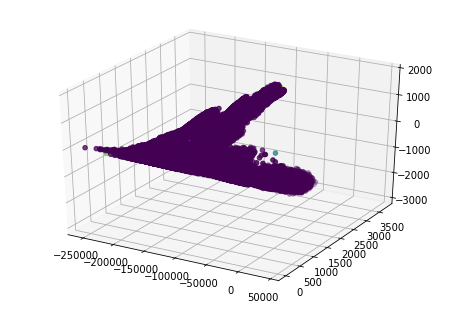

In [14]:
# IDS challenge
nSamples = 5 #how often to try a new clustering

cluster_assignments = np.zeros((len(data3Dfull),25))

for exp_idx in range(nSamples):
    print("sample: " + str(exp_idx) + "\r")
    exp_data = get_sample_from_dataset(0.05, data3Dfull)
    exp_gmm, labels, C = run_gmm(25, exp_data, True)
    
    for idx, label in enumerate(labels):
        cluster_assignments[idx, label] += 1
        
# Assign to cluster most often predicted
in_cluster = np.argmax(cluster_assignments, axis=1)
    
# Show cluster assignment
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data3Dfull['V1'], data3Dfull['V2'], data3Dfull['V3'], c=in_cluster, zorder=-50000)


In [17]:
print(cluster_assignments[0])
cluster_assignments.shape
in_cluster[0]

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  5.  0.  0.  0.  0.  0.  0.]


18

In [ ]:
# Compute cluster means in order to see inter cluster distances
# for 